# Actividad 01

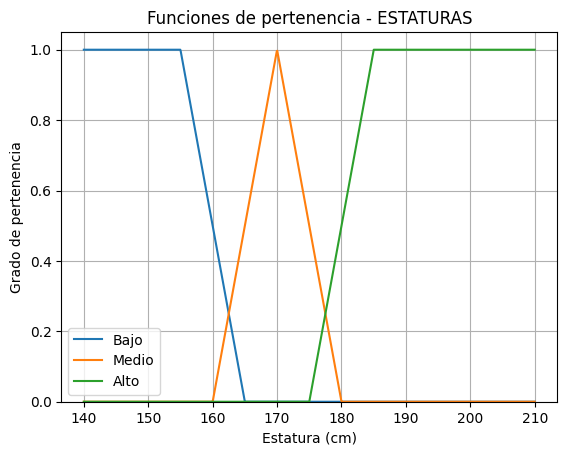

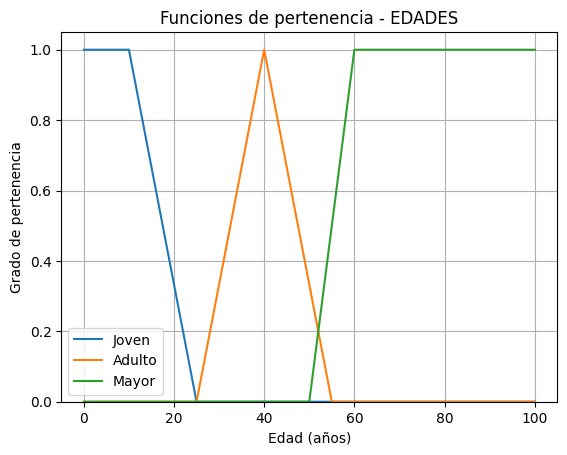

In [2]:
import matplotlib.pyplot as plt
from juzzyPython.generic.Tuple import Tuple
from juzzyPython.generic.Input import Input
from juzzyPython.type1.sets.T1MF_Triangular import T1MF_Triangular
from juzzyPython.type1.sets.T1MF_Trapezoidal import T1MF_Trapezoidal
from juzzyPython.type1.system.T1_Antecedent import T1_Antecedent
from juzzyPython.generic.Plot import Plot

# Variables lingüísticas
estaturas = Input("Estaturas", Tuple(140, 210))  # cm
edades = Input("Edades", Tuple(0, 100))          # años

# === ESTATURAS ===
bajo_mf = T1MF_Trapezoidal("Bajo", [140, 140, 155, 165])
medio_mf = T1MF_Triangular("Medio", 160, 170, 180)
alto_mf = T1MF_Trapezoidal("Alto", [175, 185, 210, 210])

# === EDADES ===
joven_mf = T1MF_Trapezoidal("Joven", [0, 0, 10, 25])
adulto_mf = T1MF_Triangular("Adulto", 25, 40, 55)
mayor_mf = T1MF_Trapezoidal("Mayor", [50, 60, 100, 100])

# Asociar MFs
bajo = T1_Antecedent(estaturas, bajo_mf, "Estatura baja")
medio = T1_Antecedent(estaturas, medio_mf, "Estatura media")
alto = T1_Antecedent(estaturas, alto_mf, "Estatura alta")
joven = T1_Antecedent(edades, joven_mf, "Joven")
adulto = T1_Antecedent(edades, adulto_mf, "Adulto")
mayor = T1_Antecedent(edades, mayor_mf, "Mayor")

# === Función para graficar con matplotlib directamente ===
def plotMF_custom(name, sets, xAxisRange, xLabel, yLabel, discretisationLevel=1000):
    plt.figure()
    plt.title(name)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

    x_vals = [xAxisRange.getLeft() + i*(xAxisRange.getRight()-xAxisRange.getLeft())/discretisationLevel for i in range(discretisationLevel + 1)]

    for mf in sets:
        y_vals = [mf.getFS(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label=mf.getName())

    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar con etiquetas personalizadas
plotMF_custom("Funciones de pertenencia - ESTATURAS", [bajo_mf, medio_mf, alto_mf], estaturas.getDomain(), "Estatura (cm)", "Grado de pertenencia")
plotMF_custom("Funciones de pertenencia - EDADES", [joven_mf, adulto_mf, mayor_mf], edades.getDomain(), "Edad (años)", "Grado de pertenencia")
